In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('netflix static/revenue/netflix-annual-revenue-2002-2023.csv')
data

,year,revenue
0,2002,150.8
1,2003,270.4
2,2004,500.6
3,2005,682.2
4,2006,996.7
5,2007,"1,205.30"
6,2008,"1,364.70"
7,2009,"1,670.30"
8,2010,"2,162.60"
9,2011,"3,204.60"


In [20]:
data['revenue_cleaned'] = pd.to_numeric(data['revenue'].str.replace(',', ''))
data

,year,revenue,revenue_cleaned,growth_rate
0,2002,150.8,150.80,0.000000
1,2003,270.4,270.40,79.310345
2,2004,500.6,500.60,85.133136
3,2005,682.2,682.20,36.276468
4,2006,996.7,996.70,46.100850
5,2007,"1,205.30",1205.30,20.929066
6,2008,"1,364.70",1364.70,13.224923
7,2009,"1,670.30",1670.30,22.393200
8,2010,"2,162.60",2162.60,29.473747
9,2011,"3,204.60",3204.60,48.182743


In [21]:
# Calculate the growth rate
data['growth_rate'] = data['revenue_cleaned'].pct_change() * 100
data['growth_rate'] = data['growth_rate'].fillna(0)
data

,year,revenue,revenue_cleaned,growth_rate
0,2002,150.8,150.80,0.000000
1,2003,270.4,270.40,79.310345
2,2004,500.6,500.60,85.133136
3,2005,682.2,682.20,36.276468
4,2006,996.7,996.70,46.100850
5,2007,"1,205.30",1205.30,20.929066
6,2008,"1,364.70",1364.70,13.224923
7,2009,"1,670.30",1670.30,22.393200
8,2010,"2,162.60",2162.60,29.473747
9,2011,"3,204.60",3204.60,48.182743


Text(0, 0.5, 'Growth Rate (%)')

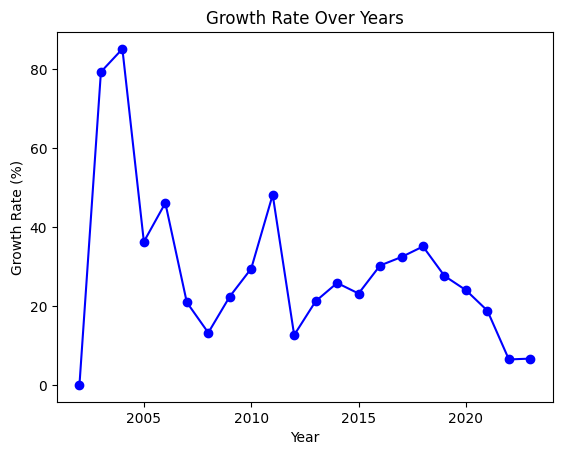

In [22]:
plt.plot(data['year'], data['growth_rate'], marker='o', color='b', linestyle='-')

plt.title('Growth Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')